### Part 0. Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import itertools
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [3]:
from RAGE import RAGE
from XY_ORACLE import XY_ORACLE
from XY_STATIC import XY_STATIC
from RAGE_opt import RAGE_opt
from RAGE_center import RAGE_center

In [4]:
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
    
logging.basicConfig(level=logging.CRITICAL, format='%(message)s')

logging.debug("This is a debug message and should not appear.")
logging.critical("This is a critical message and should appear.")


This is a critical message and should appear.


### Part 1. Synthetic Dataset

In [7]:
def transductive_problem_instance(d, rad):
    
    theta_star = np.zeros((d, 1))
    theta_star[0, 0] = 2.0
    X = np.eye(2*d)
    Z = np.eye(2*d)[0:d,:]
    Zp = np.cos(rad)*np.eye(2*d)[0:d,:]+np.sin(rad)*np.eye(2*d)[d:2*d,:] 
    Z = np.vstack((Z, Zp))
    
    theta_star = np.zeros((2*d, 1))
    theta_star[0, 0] = 1
    
    return X, Z, theta_star

In [6]:
count = 20
delta = 0.5
rad = .1
sweep = [20, 40, 60, 80]
factor = 50
d = 20

X, Z, theta_star = transductive_problem_instance(d, rad)
print(X.shape)
print(Z.shape)
print(theta_star.shape)


(40, 40)
(40, 40)
(40, 1)


In [7]:
true_reward = Z@theta_star
print(true_reward.shape)
print(true_reward.max())
print(true_reward.min())

(40, 1)
1.0
0.0


In [8]:
true_reward[true_reward > 0]
# plt.hist(true_reward[true_reward > 0])

array([1.        , 0.99500417])

### Part 2. Run RAGE

In [9]:
rage_instance = RAGE(X, theta_star, factor, delta, Z)

In [10]:
rage_instance.algorithm(200, var=False)

Succeeded? True
Sample complexity 90847


In [11]:
rage_instance.N

90847

### Part 3. Run XY Static

In [12]:
xy_static_instance = XY_STATIC(X, theta_star, delta, Z)

In [13]:
xy_static_instance.algorithm(250, sigma=1)

Succeeded? True
Sample complexity 1623920


In [14]:
xy_static_instance.N

1623920

### Part 4. Run Oracle

In [95]:
print(X.shape)
print(Z.shape)

(20, 20)
(20, 20)


In [15]:
oracle_instance = XY_ORACLE(X, theta_star, delta, Z)

In [16]:
oracle_instance.algorithm(42)

Succeeded? True
Sample complexity 33694


In [17]:
oracle_instance.N

33694

### Part 5. Run RAGE Opt

In [21]:
rage_opt_instance = RAGE_opt(X, theta_star, factor, delta, Z)


In [19]:
rage_opt_instance.algorithm(42, var=False)

Succeeded? True
Sample complexity 109678


In [22]:
rage_opt_instance.algorithm(100, var=False)

Succeeded? True
Sample complexity 87993


In [23]:
rage_opt_instance.N

87993

### Part 6. Run RAGE Center

In [24]:
rage_center_instance = RAGE_center(X, theta_star, factor, delta, Z)
rage_center_instance.algorithm(42, var=False)

Succeeded? True
Sample complexity 47253


In [25]:
rage_center_instance.N

47253

In [26]:
rage_center_instance.success

True

### Part 7. Run Synthetic Dataset Benchmarking

In [8]:
count = 20
delta = 0.05
rad = .1
sweep = [20, 40, 60, 80]
factor = 50
seeds = [42, 123, 789]

In [9]:
rage_dict = {}
xy_static_dict = {}
oracle_dict = {}
rage_opt_dict = {}
rage_center_dict = {}

for d in sweep:
    X, Z, theta_star = transductive_problem_instance(d, rad)
    rage_dict[d] = []
    xy_static_dict[d] = []
    oracle_dict[d] = []
    rage_opt_dict[d] = []
    rage_center_dict[d] = []
    
    for seed in seeds:
        print(d, seed)
        rage_instance = RAGE(X, theta_star, factor, delta, Z)
        rage_instance.algorithm(seed, var=False)
        rage_dict[d].append((rage_instance.success, rage_instance.N))
        
        xy_static_instance = XY_STATIC(X, theta_star, delta, Z)
        xy_static_instance.algorithm(seed)
        xy_static_dict[d].append((xy_static_instance.success, xy_static_instance.N))
        
        oracle_instance = XY_ORACLE(X, theta_star, delta, Z)
        oracle_instance.algorithm(seed)
        oracle_dict[d].append((oracle_instance.success, oracle_instance.N))
        
        rage_opt_instance = RAGE_opt(X, theta_star, factor, delta, Z)
        rage_opt_instance.algorithm(seed, var=False)
        rage_opt_dict[d].append((rage_opt_instance.success, rage_opt_instance.N))
        
        rage_center_instance = RAGE_center(X, theta_star, factor, delta, Z)
        rage_center_instance.algorithm(seed, var=False)
        rage_center_dict[d].append((rage_center_instance.success, rage_center_instance.N))
        

20 42


Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 2959553
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 109295
Succeeded? True
Sample complexity 55114


20 123


Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 2959553
Succeeded? True
Sample complexity 27849
Succeeded? True
Sample complexity 106248
Succeeded? True
Sample complexity 55114


20 789


Succeeded? True
Sample complexity 109852
Succeeded? True
Sample complexity 5393745
Succeeded? True
Sample complexity 33694
Succeeded? True
Sample complexity 106248
Succeeded? True
Sample complexity 77295


40 42


Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 9830099
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 214561
Succeeded? True
Sample complexity 119144


40 123


Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 5393785
Succeeded? True
Sample complexity 33694
Succeeded? True
Sample complexity 217921
Succeeded? True
Sample complexity 119144


40 789


Succeeded? True
Sample complexity 218023
Succeeded? True
Sample complexity 5393785
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 214561
Succeeded? True
Sample complexity 119144


60 42


Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 17915320
Succeeded? True
Sample complexity 49323
Succeeded? True
Sample complexity 323794
Succeeded? True
Sample complexity 187425


60 123


Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 17915320
Succeeded? True
Sample complexity 40766
Succeeded? True
Sample complexity 323558
Succeeded? True
Sample complexity 187425


60 789


Succeeded? True
Sample complexity 332245
Succeeded? True
Sample complexity 9830139
Succeeded? True
Sample complexity 49323
Succeeded? True
Sample complexity 320791
Succeeded? True
Sample complexity 187425


80 42


Succeeded? True
Sample complexity 459917
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 59677
Succeeded? True
Sample complexity 449506
Succeeded? True
Sample complexity 262226


80 123


Succeeded? True
Sample complexity 459917
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 72205
Succeeded? True
Sample complexity 450373
Succeeded? True
Sample complexity 262226


80 789


Succeeded? True
Sample complexity 459917
Succeeded? True
Sample complexity 17915360
Succeeded? True
Sample complexity 59677
Succeeded? True
Sample complexity 443560
Succeeded? True
Sample complexity 262226


In [10]:
# Save all dictionaries as json files
import json

def save_dict(json_filepath, dict_to_save):
    with open(json_filepath, 'w') as f:
        json.dump(dict_to_save, f)

def load_json(json_filepath):
    with open(json_filepath, 'r') as f:
        return json.load(f)

In [26]:
import os

outdir = "/homes/gws/sqhang/proj/2024_sqhang_Transductive-bandits/outputs/toy_dataset"

save_dict(os.path.join(outdir, "rage.json"), rage_dict)
save_dict(os.path.join(outdir, "xy_static.json"), xy_static_dict)
save_dict(os.path.join(outdir, "oracle.json"), oracle_dict)
save_dict(os.path.join(outdir, "rage_opt.json"), rage_opt_dict)
save_dict(os.path.join(outdir, "rage_center.json"), rage_center_dict)

In [27]:
load_json("/homes/gws/sqhang/proj/2024_sqhang_Transductive-bandits/outputs/toy_dataset/rage_center.json")

{'20': [[True, 55114], [True, 55114], [True, 77295]],
 '40': [[True, 119144], [True, 119144], [True, 119144]],
 '60': [[True, 187425], [True, 187425], [True, 187425]],
 '80': [[True, 262226], [True, 262226], [True, 262226]]}

In [23]:
def convert_dict_int(dictionary):
    for (key, list) in dictionary.items():
        dictionary[key] = [(bool(item[0]), int(item[1])) for item in list]
    return dictionary

In [24]:
rage_dict = convert_dict_int(rage_dict)
xy_static_dict = convert_dict_int(xy_static_dict)
oracle_dict = convert_dict_int(oracle_dict)
rage_opt_dict = convert_dict_int(rage_opt_dict)
rage_center_dict = convert_dict_int(rage_center_dict)

In [25]:
print(rage_dict)
print(xy_static_dict)
print(oracle_dict)
print(rage_opt_dict)
print(rage_center_dict)

{20: [(True, 109852), (True, 109852), (True, 109852)], 40: [(True, 218023), (True, 218023), (True, 218023)], 60: [(True, 332245), (True, 332245), (True, 332245)], 80: [(True, 459917), (True, 459917), (True, 459917)]}
{20: [(True, 2959553), (True, 2959553), (True, 5393745)], 40: [(True, 9830099), (True, 5393785), (True, 5393785)], 60: [(True, 17915320), (True, 17915320), (True, 9830139)], 80: [(True, 17915360), (True, 17915360), (True, 17915360)]}
{20: [(True, 40766), (True, 27849), (True, 33694)], 40: [(True, 40766), (True, 33694), (True, 40766)], 60: [(True, 49323), (True, 40766), (True, 49323)], 80: [(True, 59677), (True, 72205), (True, 59677)]}
{20: [(True, 109295), (True, 106248), (True, 106248)], 40: [(True, 214561), (True, 217921), (True, 214561)], 60: [(True, 323794), (True, 323558), (True, 320791)], 80: [(True, 449506), (True, 450373), (True, 443560)]}
{20: [(True, 55114), (True, 55114), (True, 77295)], 40: [(True, 119144), (True, 119144), (True, 119144)], 60: [(True, 187425), 

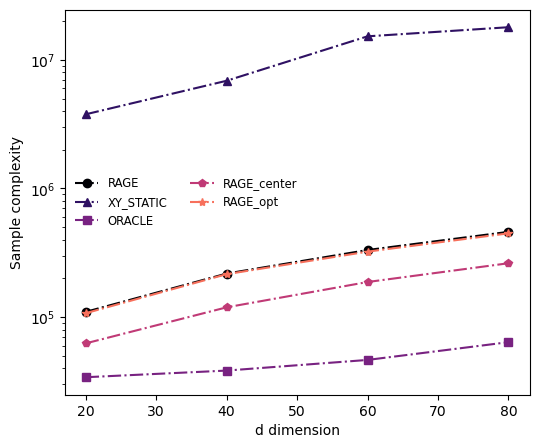

In [14]:
# New Plot: Jun 3rd
# Predefined color-blind friendly colors
colors = plt.get_cmap('magma')
markers = ['o', '^', 's', 'p', '*']

num_lines = 5
color_indices = np.linspace(0.0, 0.7, num_lines)

plt.figure(figsize=(6, 5))
for idx, (method_dict, label) in enumerate(zip([rage_dict, xy_static_dict, oracle_dict, rage_center_dict, rage_opt_dict],
                              ['RAGE', 'XY_STATIC', 'ORACLE', 'RAGE_center', 'RAGE_opt'])):
    means = [np.mean([n for _, n in method_dict[d]]) for d in sweep]
    color = colors(color_indices[idx])
    plt.plot(sweep, means, label=label, color=color, marker=markers[idx % len(markers)], linestyle="dashdot")

plt.xlabel('d dimension')
plt.ylabel('Sample complexity')
plt.yscale('log')
# plt.title('Average Sample Complexity Across Methods')

plt.legend(frameon=False, ncol=2, fontsize="small")
plt.show()
